In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import simps
from Ev_Search import ML
from Ev_Search.loaders import filter_data
import numpy as np
import operator
import pandas as pd

import Ev_Search.Tools_For_Anal as A

After first ~80, just considering best runs with all features from different datasets for BMI

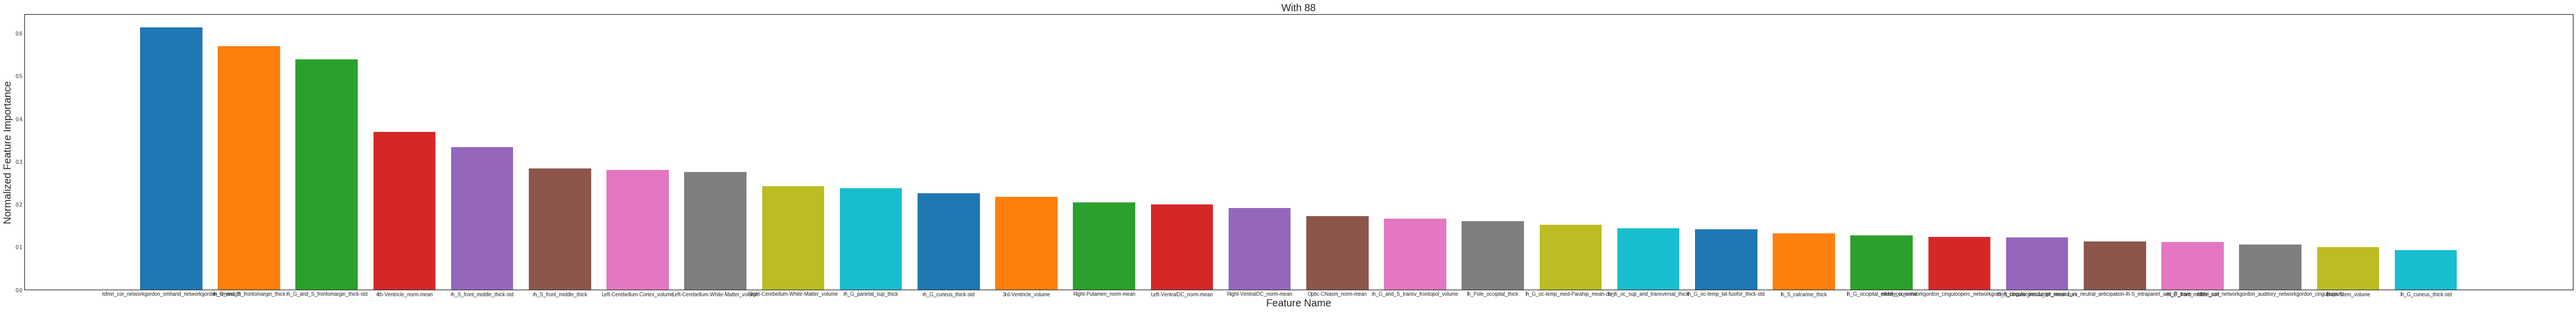

In [2]:
items = A.load_file('Stats/BMI_best_keys(1).txt')
fc, feat_count = A.get_weighted_feature_counts(items, score_lim=-5)
A.plot_feat_importance(fc, 'With ' + str(feat_count), top=30, print_scores=False, save=False)

In [7]:
sl = 0

for n in [50, 100, 150, 200, 250, 300, 250, 300, 350]:
    fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
    top_feats = A.get_sorted_labels(fc, n)

    X,y,X_val,y_val = A.load_saved('Data/BMI_data.csv', 'Data/BMI_val_data.csv', top_feats)

    tr_score = ML.evaluate_regression_model(X, y, model_type=['elastic cv'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
    val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['elastic cv'], int_cv=3, metric='r2', target_transform=None)
    print(n, tr_score[0], val_score)

50 0.1626073047480469 0.1784690230923418
100 0.18100604777706886 0.19536546119266673
150 0.19285136087226018 0.20182292361557697
200 0.186709938689525 0.20758754406728186
250 0.1886275285786687 0.20937241631865344
300 0.191243726339649 0.20933600685568576
250 0.18284605532667492 0.20937241631865344
300 0.1855224917213275 0.20933600685568576
350 0.19090177747030407 0.2060318908066302


Scores on the outer validation set from the best performing # of features, trained on train + inner-validation

In [12]:
for n in [150, 300]:

    fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
    top_feats = A.get_sorted_labels(fc, n)
    
    X,y,X_val,y_val = A.load_saved(['Data/BMI_data.csv', 'Data/BMI_val_data.csv'], 'Data/BMIouter_val_data.csv', top_feats)
    tr_score = ML.evaluate_regression_model(X, y, model_type=['elastic cv'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
    val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['elastic cv'], int_cv=3, metric='r2', target_transform=None)
    print(n, tr_score[0], val_score)

150 0.1928425192752412 0.17036723900313577
300 0.18880419391441622 0.17366038354301794


Equiv. outer fold score if just elastic net is used

In [15]:
X,y,X_val,y_val = A.load_saved(['Data/BMI_data.csv', 'Data/BMI_val_data.csv'], 'Data/BMIouter_val_data.csv', None)
tr_score = ML.evaluate_regression_model(X, y, model_type=['elastic cv'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['elastic cv'], int_cv=3, metric='r2', target_transform=None)
print(n, tr_score[0], val_score)

/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

300 0.1437373139389665 0.17022377454194093


Base full lightbgm score on outer fold when trained on train and validated on inner validation, with all features

In [16]:
X,y,X_val,y_val = A.load_saved('Data/BMI_data.csv', 'Data/BMI_val_data.csv', None)
tr_score = ML.evaluate_regression_model(X, y, model_type=['full lightgbm'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['full lightgbm'], int_cv=3, metric='r2', target_transform=None)
print(n, tr_score[0], val_score)

300 0.12534573827480097 0.11351364867841929


In [20]:
X,y,X_val,y_val = A.load_saved('Data/BMI_data.csv', 'Data/BMI_val_data.csv', None)

In [23]:
.5 // 2866 // .5

5732.0

Adding an additional 20 best runs, with access to only the top 360 features from before

In [19]:
for n in [20, 50, 100, 200, 300, 350]:    
    fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
    top_feats = A.get_sorted_labels(fc, n)

    X,y,X_val,y_val = A.load_saved('Data/BMI_data.csv', 'Data/BMI_val_data.csv', top_feats)

    tr_score = ML.evaluate_regression_model(X, y, model_type=['full lightgbm'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
    val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['full lightgbm'], int_cv=3, metric='r2', target_transform=None)
    print(n, tr_score[0], val_score)

KeyboardInterrupt: 

In [ ]:
sl, n = .10, 500
fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
top_feats = A.get_sorted_labels(fc, n)

In [ ]:
tr_score = ML.evaluate_regression_model(X, y, model_type=['elastic cv', 'linear', 'full lightgbm'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['elastic cv', 'linear', 'full lightgbm'], int_cv=3, metric='r2', target_transform=None)
print('ensemble', tr_score[0], val_score)

In [ ]:
score_lims = [.075, .1, .11]
top_nums = [5, 8, 10, 20, 30, 50, 80, 100, 200, 300, 400, 500]

for sl in score_lims:
    fc, feat_count = get_weighted_feature_counts(items, score_lim=sl)
    
    for n in top_nums:
        top_feats = get_sorted_labels(fc, n)

        train = filter_data(pd.read_csv('BMI_data.csv'), i_keys=top_feats)
        val = filter_data(pd.read_csv('BMI_val_data.csv'), i_keys=top_feats)
        X,y = np.array(train.drop('score', axis=1)), np.array(train.score)
        X_val,y_val = np.array(val.drop('score', axis=1)), np.array(val.score)

        tr_score = ML.evaluate_regression_model(X, y, model_type='elastic cv', n_splits=3, n_repeats=2, int_cv=3, metric='r2', target_transform=None)
        val_score = ML.test_regression_model(X, y, X_val, y_val, model_type='elastic cv', int_cv=3, metric='r2', target_transform=None)
        print(sl, n, 'elastic', tr_score[0], val_score)

In [ ]:
sl, n = .11, 300
fc, feat_count = get_weighted_feature_counts(items, score_lim=sl)
top_feats = get_sorted_labels(fc, n)

train = filter_data(pd.read_csv('BMI_data.csv'), i_keys=top_feats)
val = filter_data(pd.read_csv('BMI_val_data.csv'), i_keys=top_feats)
X,y = np.array(train.drop('score', axis=1)), np.array(train.score)
X_val,y_val = np.array(val.drop('score', axis=1)), np.array(val.score)

tr_score = ML.evaluate_regression_model(X, y, model_type='full lightgbm', n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type='full lightgbm', int_cv=3, metric='r2', target_transform=None)
print(sl, n, 'full light gbm', tr_score[0], val_score)

In [ ]:
train = filter_data(pd.read_csv('Stats/BMI_data.csv'), i_keys=None)
val = filter_data(pd.read_csv('Stats/BMI_val_data.csv'), i_keys=None)
X,y = np.array(train.drop('score', axis=1)), np.array(train.score)
X_val,y_val = np.array(val.drop('score', axis=1)), np.array(val.score)

#tr_score = ML.evaluate_regression_model(X, y, model_type='full lightgbm', n_splits=3, n_repeats=2, int_cv=3, metric='r2')
#val_score = ML.test_regression_model(X, y, X_val, y_val, model_type='full lightgbm', int_cv=3, metric='r2', target_transform=None)
#print('full light gbm', tr_score[0], val_score)

In [ ]:
tr_score = ML.evaluate_regression_model(X, y, model_type='elastic cv', n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type='elastic cv', int_cv=3, metric='r2', target_transform=None)
print('full light gbm', tr_score[0], val_score)

In [ ]:
np.mean([[1,2,3], [1,2,3]], axis=0)

In [ ]:
sl, n = .11, 300
fc, feat_count = get_weighted_feature_counts(items, score_lim=sl)
top_feats = get_sorted_labels(fc, n)

train = filter_data(pd.read_csv('Stats/BMI_data.csv'), i_keys=top_feats)
val = filter_data(pd.read_csv('Stats/BMI_val_data.csv'), i_keys=top_feats)
X,y = np.array(train.drop('score', axis=1)), np.array(train.score)
X_val,y_val = np.array(val.drop('score', axis=1)), np.array(val.score)


tr_score = ML.evaluate_regression_model(X, y, model_type=['elastic cv'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['elastic cv'], int_cv=3, metric='r2', target_transform=None)
print('ensemble', tr_score[0], val_score)